# Loading of all necessary Libraries 

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#For VIF calculation to understand the multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#For verification of model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt


In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Loading of data from dataset

In [3]:
car_price = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
car_price.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase   ...     enginesize  \
0  convertible        rwd          front       88.6   ...            130   
1  convertible        rwd          front       88.6   ...            130   
2    hatchback        rwd          front       94.5   ...            152   
3        sedan        fwd          front       99.8   ...            109   
4        sedan        4wd          front       99.4   ...            136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

# Data Cleaning - Fixing Rows and Columns

In [5]:
##Calculation of missing values
missing_val = round(100*(car_price.isnull().sum()/car_price.shape[0]),2)
print(missing_val)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64


In [6]:
# We can see that there is no missing values, so we are not required to impute values here
# Lets create the column for CarName which should contain only the Car name and not model
car_price['CarCompanyName'] = car_price['CarName'].apply(lambda x: x.split()[0])
car_price[['CarName','CarCompanyName']]

CarName CarCompanyName
0              alfa-romero giulia    alfa-romero
1             alfa-romero stelvio    alfa-romero
2        alfa-romero Quadrifoglio    alfa-romero
3                     audi 100 ls           audi
4                      audi 100ls           audi
5                        audi fox           audi
6                      audi 100ls           audi
7                       audi 5000           audi
8                       audi 4000           audi
9             audi 5000s (diesel)           audi
10                       bmw 320i            bmw
11                       bmw 320i            bmw
12                         bmw x1            bmw
13                         bmw x3            bmw
14                         bmw z4            bmw
15                         bmw x4            bmw
16                         bmw x5            bmw
17                         bmw x3            bmw
18               chevrolet impala      chevrolet
19          chevrolet monte carlo      chevrolet
20            chevrolet vega 2300      chevrolet
21                  dodge rampage          dodge
22            dodge challenger se          dodge
23                     dodge d200          dodge
24              dodge monaco (sw)          dodge
25             dodge colt hardtop          dodge
26                dodge colt (sw)          dodge
27           dodge coronet custom          dodge
28              dodge dart custom          dodge
29      dodge coronet custom (sw)          dodge
..                            ...            ...
175                 toyota corona         toyota
176                toyota corolla         toyota
177                toyota mark ii         toyota
178       toyota corolla liftback         toyota
179                 toyota corona         toyota
180                toyota starlet         toyota
181                toyouta tercel        toyouta
182              vokswagen rabbit      vokswagen
183  volkswagen 1131 deluxe sedan     volkswagen
184          volkswagen model 111     volkswagen
185             volkswagen type 3     volkswagen
186           volkswagen 411 (sw)     volkswagen
187       volkswagen super beetle     volkswagen
188             volkswagen dasher     volkswagen
189                     vw dasher             vw
190                     vw rabbit             vw
191             volkswagen rabbit     volkswagen
192      volkswagen rabbit custom     volkswagen
193             volkswagen dasher     volkswagen
194               volvo 145e (sw)          volvo
195                   volvo 144ea          volvo
196                   volvo 244dl          volvo
197                     volvo 245          volvo
198                   volvo 264gl          volvo
199                  volvo diesel          volvo
200               volvo 145e (sw)          volvo
201                   volvo 144ea          volvo
202                   volvo 244dl          volvo
203                     volvo 246          volvo
204                   volvo 264gl          volvo

[205 rows x 2 columns]

In [7]:
##Drop the CarName column as it contains Car Name and Model, however we only need Car Name which is 
##already segregated in CarCompanyName 
car_price.drop(columns = 'CarName', inplace = True)

In [8]:
#Now we try to Encode the categorical features as numeric values
type(car_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg       

NoneType

In [9]:
##feature doornumber and cylindernumber has string values which we need to convert to numeric values
print(car_price['doornumber'].value_counts(),'\n')
print(car_price['cylindernumber'].value_counts())

four    115
two      90
Name: doornumber, dtype: int64 

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64


In [10]:
# Applying the mapping to 'doornumber' and 'cylindernumber' feature
car_price['doornumber'] = car_price['doornumber'].map({'four': 4, 'two': 2})
car_price['cylindernumber'] = car_price['cylindernumber'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6,
                                                              'eight': 8, 'twelve': 12})

In [11]:
##feature doornumber and cylindernumber has now numeric data
print(car_price['doornumber'].value_counts(),'\n')
print(car_price['cylindernumber'].value_counts())

4    115
2     90
Name: doornumber, dtype: int64 

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64


In [12]:
car_price.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'CarCompanyName'],
      dtype='object')

In [13]:
## Collecting all the columns which are of 'object' type
object_cols = []
for col in car_price.columns:
    if car_price[col].dtypes == 'object':
        object_cols.append(col)

In [14]:
##Categorization of Features based on if it has ordered data or unordered data, in case of ordered categorical data we will
##use LabelEncoder but in case of unordered categorical data we will use get_dummies

#Initialising the list for ordered categorical features
order_cat_feature = []

#Initialising the list for unordered categorical features
unorder_cat_feature = []

object_cols

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem',
 'CarCompanyName']

In [15]:
for col in object_cols:
    print("-----------------------------")
    print("Feature::\t", col)
    print(car_price[col].value_counts())


-----------------------------
Feature::	 fueltype
gas       185
diesel     20
Name: fueltype, dtype: int64
-----------------------------
Feature::	 aspiration
std      168
turbo     37
Name: aspiration, dtype: int64
-----------------------------
Feature::	 carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
-----------------------------
Feature::	 drivewheel
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
-----------------------------
Feature::	 enginelocation
front    202
rear       3
Name: enginelocation, dtype: int64
-----------------------------
Feature::	 enginetype
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
-----------------------------
Feature::	 fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64
-----------------------------
Feature::

In [16]:
##We can clearly see that there are some data issue in CarCompanyName as few case sensitive and duplicate name 
# exist with same name, lets fix these before proceeding

#Converting names in uppercase
car_price['CarCompanyName'] = car_price['CarCompanyName'].apply(lambda x: str(x).strip().upper())
car_price['CarCompanyName'].value_counts()

TOYOTA         31
NISSAN         18
MAZDA          15
MITSUBISHI     13
HONDA          13
SUBARU         12
PEUGEOT        11
VOLVO          11
DODGE           9
VOLKSWAGEN      9
BMW             8
BUICK           8
AUDI            7
PLYMOUTH        7
SAAB            6
ISUZU           4
PORSCHE         4
JAGUAR          3
ALFA-ROMERO     3
CHEVROLET       3
VW              2
RENAULT         2
MAXDA           2
MERCURY         1
PORCSHCE        1
VOKSWAGEN       1
TOYOUTA         1
Name: CarCompanyName, dtype: int64

In [17]:
def conv(x):
    if x == 'TOYOUTA':
        return 'TOYOTA'
    elif x == 'MAXDA':
        return 'MAZDA'
    elif x == 'VOKSWAGEN':
        return 'VOLKSWAGEN'
    elif x == 'VW':
        return 'VOLKSWAGEN'
    elif x == 'PORCSHCE':
        return 'PORSCHE'
    else:
        return x
##We can see that the there exists spelling duplicates for 'TOYOTA', 'VOLKSWAGEN', 'MAZDA', 'PORSCHE', lets clean this
car_price['CarCompanyName'] = car_price['CarCompanyName'].apply(conv)
#map({'TOYOUTA': 'TOYOTA', 'MAXDA': 'MAZDA', 
#                                                               'VOKSWAGEN': 'VOLKSWAGEN', 'PORCSHCE': 'PORSCHE'})
car_price['CarCompanyName'].value_counts()

TOYOTA         32
NISSAN         18
MAZDA          17
MITSUBISHI     13
HONDA          13
VOLKSWAGEN     12
SUBARU         12
PEUGEOT        11
VOLVO          11
DODGE           9
BMW             8
BUICK           8
AUDI            7
PLYMOUTH        7
SAAB            6
PORSCHE         5
ISUZU           4
ALFA-ROMERO     3
CHEVROLET       3
JAGUAR          3
RENAULT         2
MERCURY         1
Name: CarCompanyName, dtype: int64

In [18]:
##Clearly features 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
# 'fuelsystem', 'CarCompanyName' are unordered categorical

##So all the categorical features are unordered
unorder_cat_feature = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
                       'fuelsystem', 'CarCompanyName']

In [19]:
type(car_price.info())
numeric_continuous_features = ['symboling','doornumber','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber',
                    'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg',
                    'price']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null int64
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg         

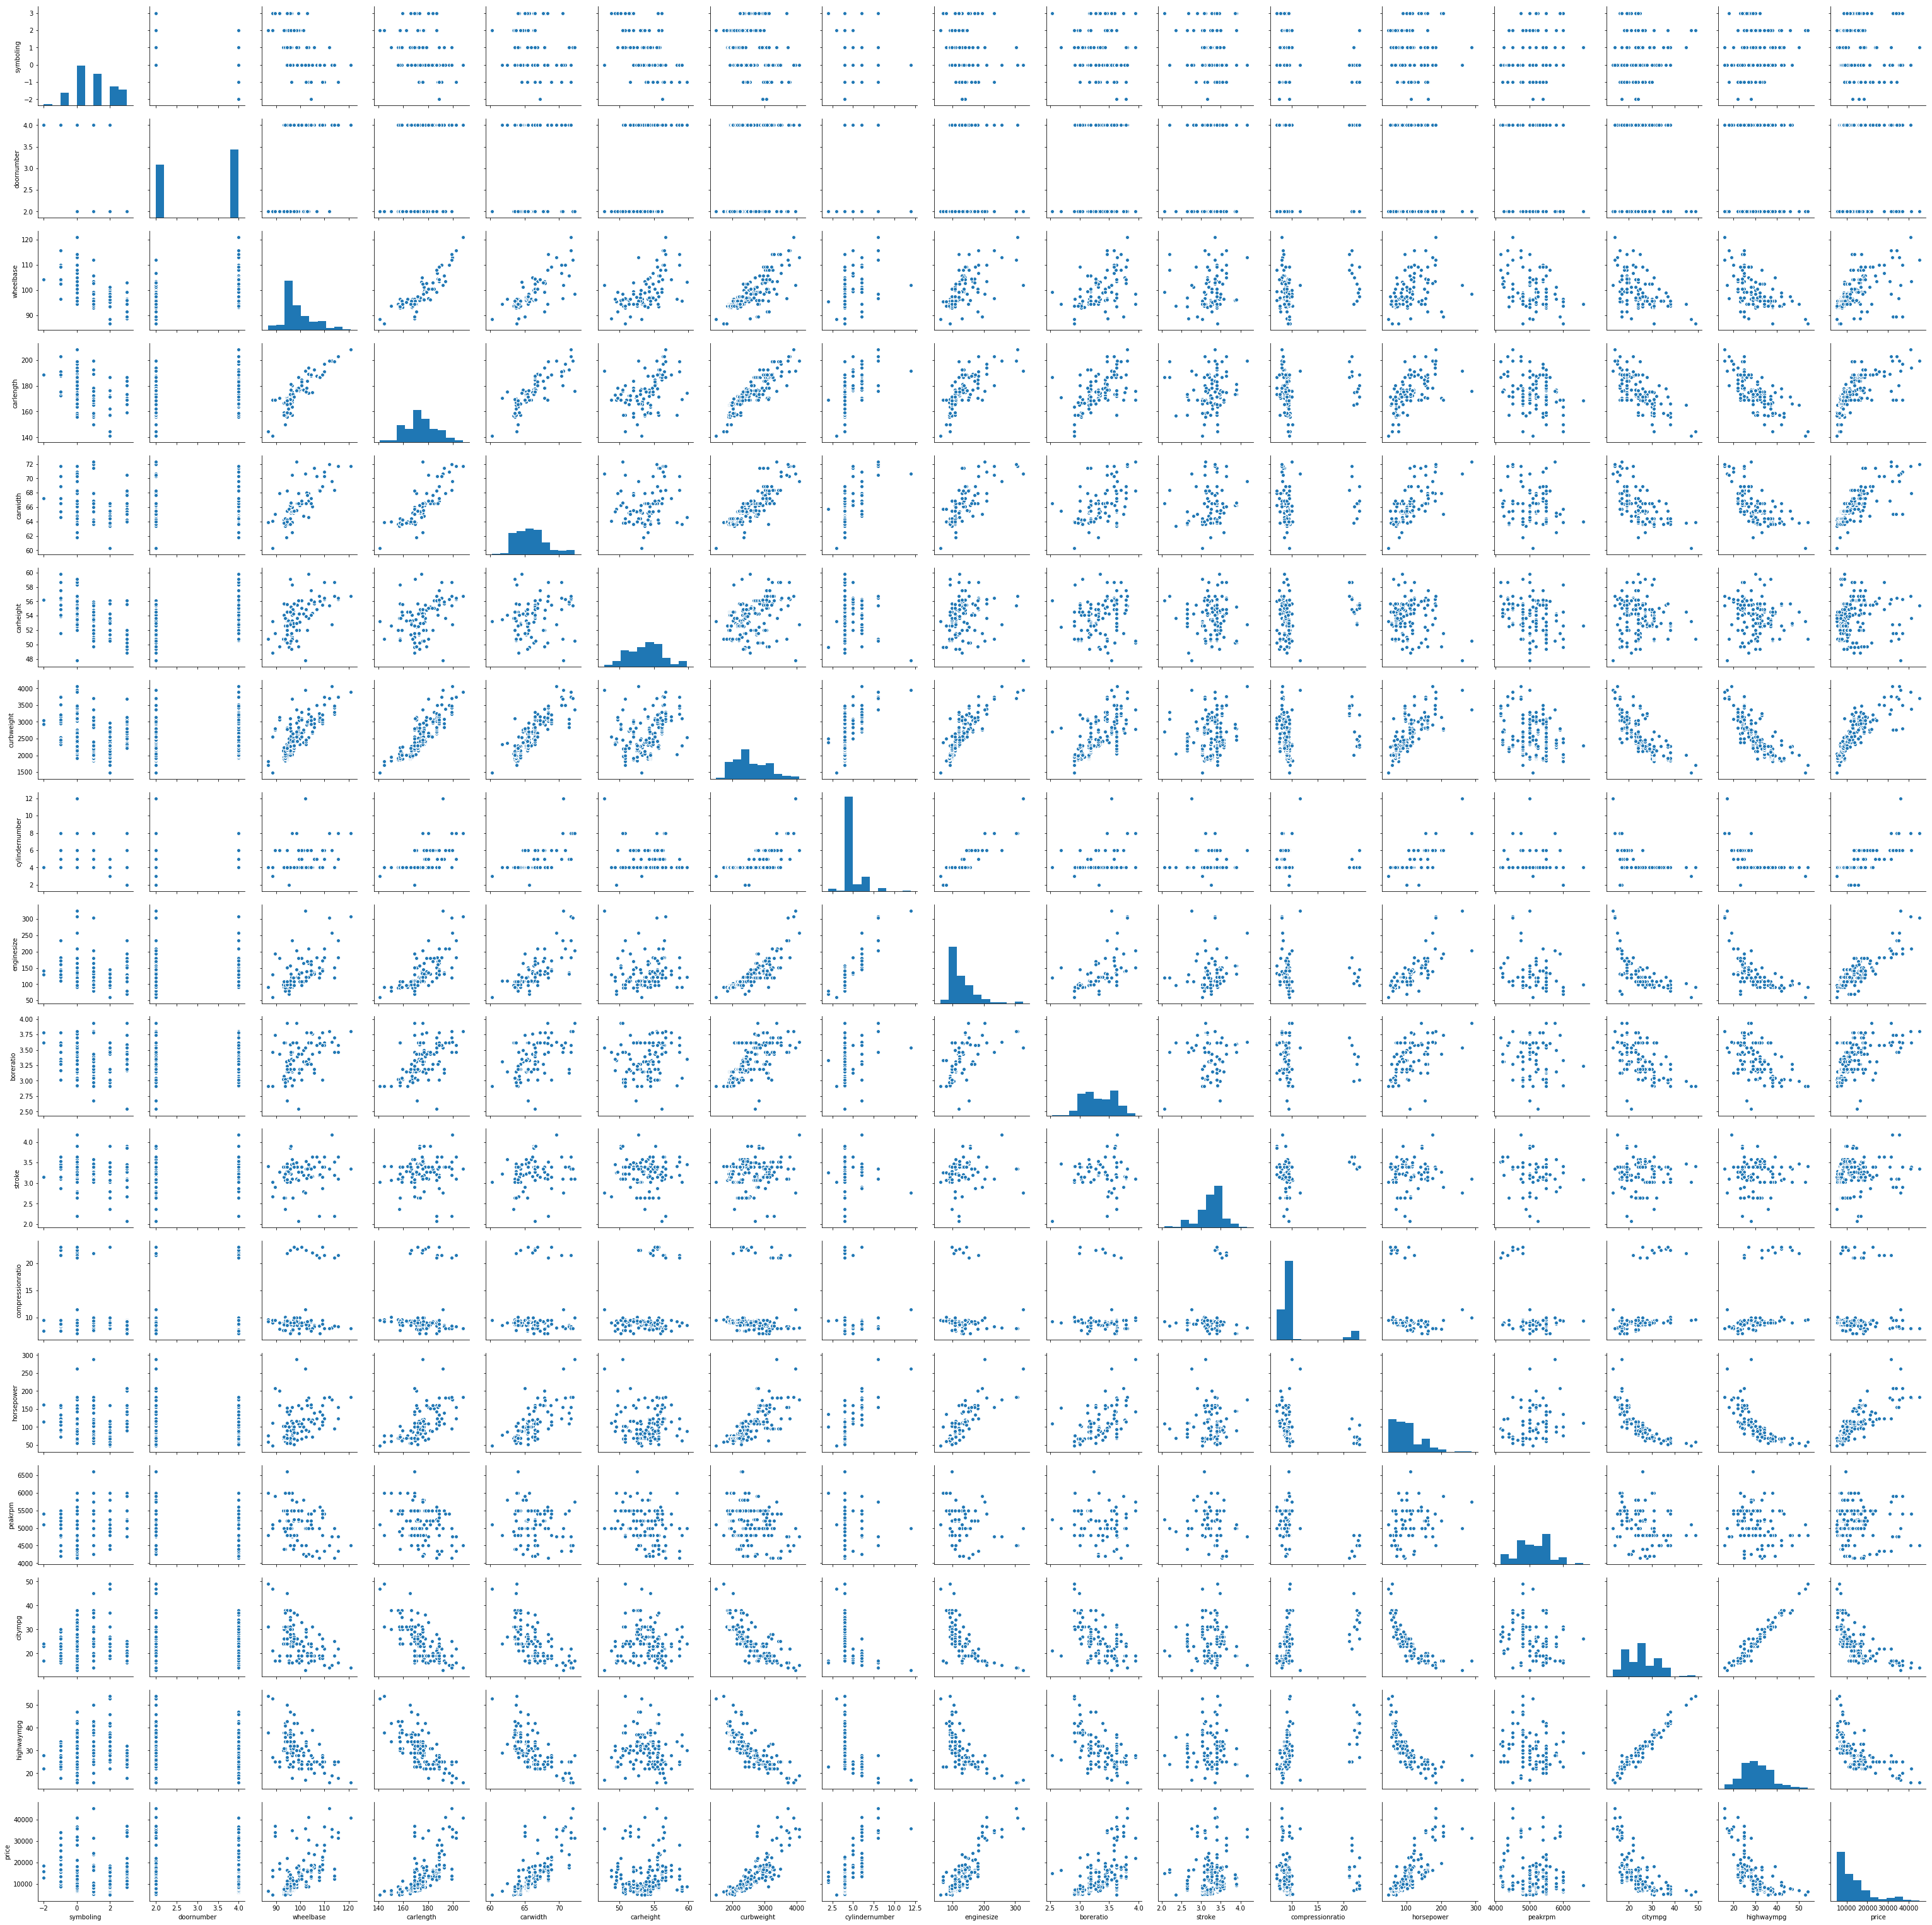

In [20]:
##plotting pairwise to check the existance of linear relation
sns.pairplot(car_price[numeric_continuous_features])
plt.show()

##From the plot we can clearly see that there exist some linear relation for Price with some features, 
# so we can use Linear regression here

In [21]:
##Preparing Dummies for all features present in the list unorder_cat_feature

dummy_features = []

for feature in unorder_cat_feature:
    dummies = pd.get_dummies(car_price[feature], drop_first = True)
    car_price = pd.concat([car_price,dummies], axis = 1)
    dummy_features = dummy_features + dummies.columns.get_values().tolist()

In [22]:
dummy_features

['gas',
 'turbo',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 'fwd',
 'rwd',
 'rear',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 '2bbl',
 '4bbl',
 'idi',
 'mfi',
 'mpfi',
 'spdi',
 'spfi',
 'AUDI',
 'BMW',
 'BUICK',
 'CHEVROLET',
 'DODGE',
 'HONDA',
 'ISUZU',
 'JAGUAR',
 'MAZDA',
 'MERCURY',
 'MITSUBISHI',
 'NISSAN',
 'PEUGEOT',
 'PLYMOUTH',
 'PORSCHE',
 'RENAULT',
 'SAAB',
 'SUBARU',
 'TOYOTA',
 'VOLKSWAGEN',
 'VOLVO']

In [23]:
car_price.head()

car_ID  symboling fueltype aspiration  doornumber      carbody drivewheel  \
0       1          3      gas        std           2  convertible        rwd   
1       2          3      gas        std           2  convertible        rwd   
2       3          1      gas        std           2    hatchback        rwd   
3       4          2      gas        std           4        sedan        fwd   
4       5          2      gas        std           4        sedan        4wd   

  enginelocation  wheelbase  carlength  ...    NISSAN  PEUGEOT  PLYMOUTH  \
0          front       88.6      168.8  ...         0        0         0   
1          front       88.6      168.8  ...         0        0         0   
2          front       94.5      171.2  ...         0        0         0   
3          front       99.8      176.6  ...         0        0         0   
4          front       99.4      176.6  ...         0        0         0   

  PORSCHE  RENAULT  SAAB SUBARU  TOYOTA  VOLKSWAGEN  VOLVO  
0       0        0     0      0       0           0      0  
1       0        0     0      0       0           0      0  
2       0        0     0      0       0           0      0  
3       0        0     0      0       0           0      0  
4       0        0     0      0       0           0      0  

[5 rows x 69 columns]

In [24]:
##lets us create a new dataframe which will contain only the required features
# We add all the numeric continuous features and all dummy features, 
all_features = numeric_continuous_features + dummy_features
car_price_model = car_price[all_features]

In [25]:
car_price_model[numeric_continuous_features].head()

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0          3           2       88.6      168.8      64.1       48.8   
1          3           2       88.6      168.8      64.1       48.8   
2          1           2       94.5      171.2      65.5       52.4   
3          2           4       99.8      176.6      66.2       54.3   
4          2           4       99.4      176.6      66.4       54.3   

   curbweight  cylindernumber  enginesize  boreratio  stroke  \
0        2548               4         130       3.47    2.68   
1        2548               4         130       3.47    2.68   
2        2823               6         152       2.68    3.47   
3        2337               4         109       3.19    3.40   
4        2824               5         136       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0               9.0         111     5000       21          27  13495.0  
1               9.0         111     5000       21          27  16500.0  
2               9.0         154     5000       19          26  16500.0  
3              10.0         102     5500       24          30  13950.0  
4               8.0         115     5500       18          22  17450.0

In [26]:
car_price_model.compressionratio.value_counts()

9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
9.20      8
8.00      8
7.00      7
21.00     5
7.50      5
9.60      5
23.00     5
8.40      5
8.60      5
21.50     4
7.60      4
10.00     3
22.50     3
8.30      3
8.80      3
7.70      2
8.10      2
9.31      1
21.90     1
22.00     1
11.50     1
9.41      1
10.10     1
9.10      1
22.70     1
7.80      1
Name: compressionratio, dtype: int64

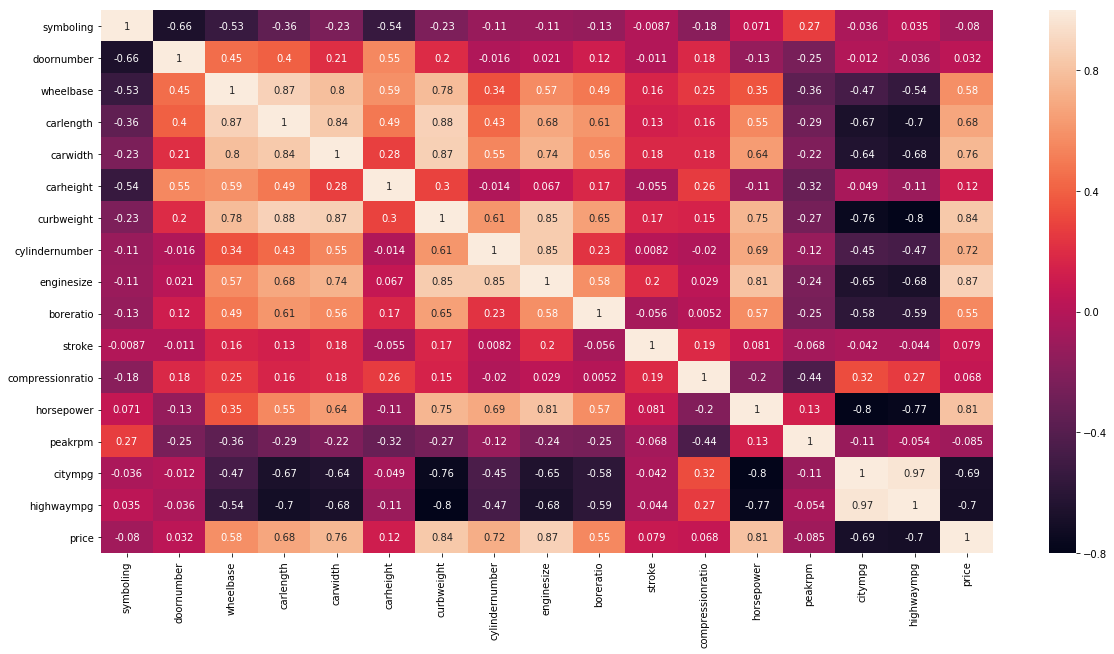

In [27]:
##plot correlation heat map amongst numeric continuous features
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(car_price_model[numeric_continuous_features].corr(),annot = True)

In [28]:
##also we can notice that there is a high correlation between carlength and carwidth..so we create a new column 
# called surface_area = carlength x carwidth, and remove carlength and carwidth
car_price_model['ground_area'] = car_price_model['carlength'] * car_price_model['carwidth']
numeric_continuous_features.append('ground_area')
numeric_continuous_features.remove('carlength')
numeric_continuous_features.remove('carwidth')


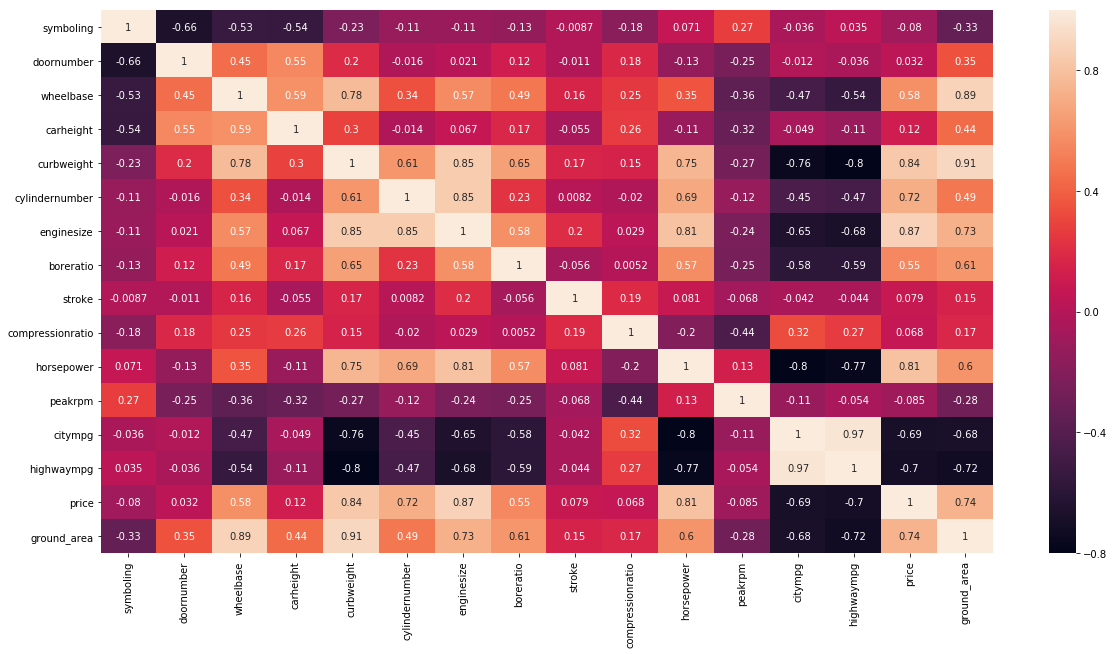

In [29]:
##plot correlation heat map amongst numeric continuous features
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(car_price_model[numeric_continuous_features].corr(),annot = True)

# Splitting of Data into Training and Testing Datasets

In [30]:
##spliting the data into training and test set
df_train, df_test = train_test_split(car_price_model, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
##Prepare list of features from numeric_continuous_features to apply normalisation
apply_norm_features = ['wheelbase','ground_area','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
                       'compressionratio','horsepower','peakrpm','citympg','highwaympg']


# Rescaling of features - Applying Min-Max Scaling

In [32]:
##Rescaling the Features
# We will use MinMax scaling.
##now we apply normalization to df_train for Rescaling to 'apply_norm_features'
scaler = MinMaxScaler()
df_train[apply_norm_features] = scaler.fit_transform(df_train[apply_norm_features])

df_train.head()


symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
122          1           4   0.244828   0.426016  0.291667   0.265487   
125          3           2   0.272414   0.452033  0.666667   0.212389   
166          1           2   0.272414   0.448780  0.308333   0.424779   
1            3           2   0.068966   0.450407  0.316667   0.088496   
199         -1           4   0.610345   0.775610  0.575000   0.858407   

     curbweight  cylindernumber  enginesize  boreratio     ...       PEUGEOT  \
122    0.272692               4    0.139623   0.230159     ...             0   
125    0.500388               4    0.339623   1.000000     ...             0   
166    0.314973               4    0.139623   0.444444     ...             0   
1      0.411171               4    0.260377   0.626984     ...             0   
199    0.647401               4    0.260377   0.746032     ...             0   

     PLYMOUTH  PORSCHE  RENAULT  SAAB  SUBARU  TOYOTA  VOLKSWAGEN  VOLVO  \
122         1        0        0     0       0       0           0      0   
125         0        1        0     0       0       0           0      0   
166         0        0        0     0       0       1           0      0   
1           0        0        0     0       0       0           0      0   
199         0        0        0     0       0       0           0      1   

     ground_area  
122     0.359817  
125     0.503073  
166     0.380265  
1       0.384134  
199     0.694411  

[5 rows x 61 columns]

In [33]:
##Dividing into X and Y sets for the model building
y_train = df_train.pop('price')
X_train = df_train

In [34]:
all_features

['symboling',
 'doornumber',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'gas',
 'turbo',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 'fwd',
 'rwd',
 'rear',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 '2bbl',
 '4bbl',
 'idi',
 'mfi',
 'mpfi',
 'spdi',
 'spfi',
 'AUDI',
 'BMW',
 'BUICK',
 'CHEVROLET',
 'DODGE',
 'HONDA',
 'ISUZU',
 'JAGUAR',
 'MAZDA',
 'MERCURY',
 'MITSUBISHI',
 'NISSAN',
 'PEUGEOT',
 'PLYMOUTH',
 'PORSCHE',
 'RENAULT',
 'SAAB',
 'SUBARU',
 'TOYOTA',
 'VOLKSWAGEN',
 'VOLVO']

In [35]:
##Removing 'carlength' and 'carwidth' from all features as we already have a derived feature called 'ground_area'
all_features.remove('carlength')
all_features.remove('carwidth')
all_features.remove('price')

In [36]:
X_train = df_train[all_features]

# Starting the Modelling with Recursive Feature Elimination

In [37]:
##Recursive feature elimination
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 25),
 ('doornumber', False, 22),
 ('wheelbase', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', False, 4),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 5),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('gas', True, 1),
 ('turbo', True, 1),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 21),
 ('rwd', False, 23),
 ('rear', True, 1),
 ('dohcv', False, 3),
 ('l', True, 1),
 ('ohc', True, 1),
 ('ohcf', True, 1),
 ('ohcv', False, 11),
 ('rotor', True, 1),
 ('2bbl', False, 10),
 ('4bbl', False, 8),
 ('idi', True, 1),
 ('mfi', False, 26),
 ('mpfi', False, 24),
 ('spdi', False, 18),
 ('spfi', False, 28),
 ('AUDI', False, 20),
 ('BMW', True, 1),
 ('BUICK', True, 1),
 ('CHEVROLET', False, 2),
 ('DODGE', True, 1),
 ('HONDA', False, 6),
 ('ISUZU', False, 9),
 ('JAGUAR', False, 

In [39]:
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['wheelbase', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'peakrpm', 'citympg', 'highwaympg', 'gas',
       'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'rear', 'l', 'ohc',
       'ohcf', 'rotor', 'idi', 'BMW', 'BUICK', 'DODGE', 'MITSUBISHI',
       'PEUGEOT', 'PLYMOUTH', 'PORSCHE', 'SAAB'],
      dtype='object')

In [40]:
#Generic method for calculation and display of VIF
def cal_VIF(X):
    vif = pd.DataFrame()
    #X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [41]:
##Model 1

##Building model using statsmodel, for the detailed statistics
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col_rfe]

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [42]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [43]:
#Let's see the summary of our linear model
print('\t \t \t \t Model 1')
print(lm.summary())

	 	 	 	 Model 1
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     89.14
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.68e-65
Time:                        15:53:45   Log-Likelihood:                -1257.2
No. Observations:                 143   AIC:                             2574.
Df Residuals:                     113   BIC:                             2663.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6839.2

In [44]:
##We can see that p-value in Model 1 for feature citympg is very high 0.620 so lets rmeove this column and rebulild the model

##Remove the feature citympg and making Model 2
X_train_rfe.drop(columns = 'citympg', inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print('\t \t \t \t Model 2')
print(lm.summary())

	 	 	 	 Model 2
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     92.92
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.90e-66
Time:                        15:53:45   Log-Likelihood:                -1257.4
No. Observations:                 143   AIC:                             2573.
Df Residuals:                     114   BIC:                             2659.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6703.8

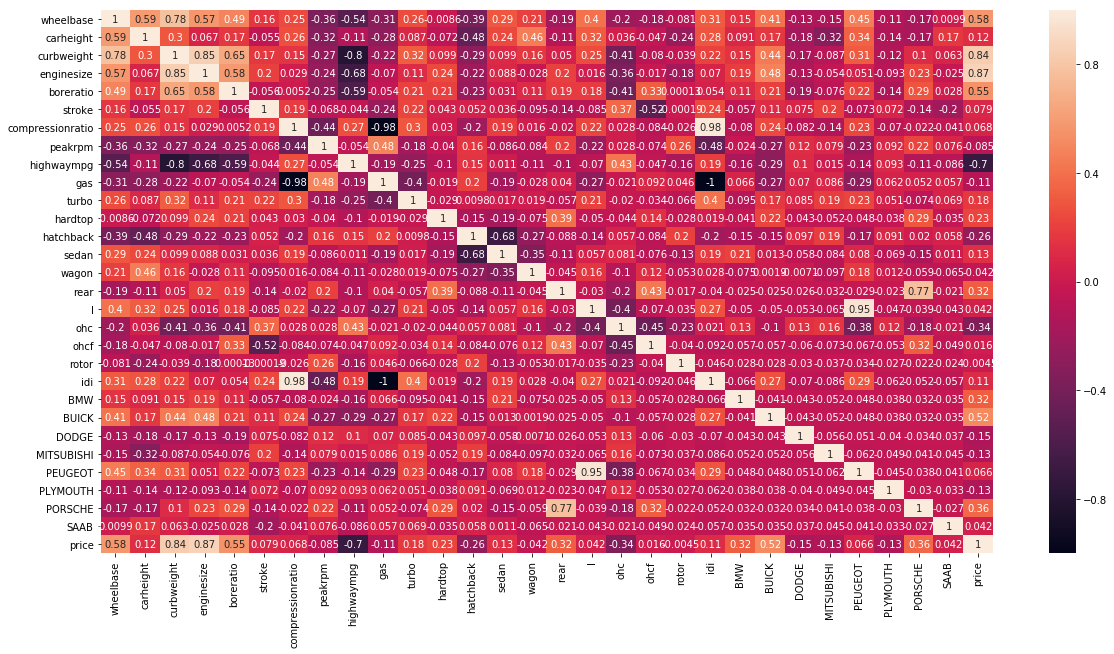

In [45]:
col_list = X_train_rfe.columns.get_values().tolist()
col_list.remove('const')
col_list.append('price')

##plot correlation heat map amongst numeric continuous features
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(car_price_model[col_list].corr(),annot = True)

In [46]:
##The next feature having highest p-value is 0.105 for feature 'gas', also this feature doesn't have any high correlation with
# dependent variable 'price', so it is safe to remove derived feature 'gas' from model and create new model

##  Model 3
X_train_rfe.drop(columns = 'gas', inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print('\t \t \t \t Model 3')
print(lm.summary())

	 	 	 	 Model 3
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     92.92
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.90e-66
Time:                        15:53:49   Log-Likelihood:                -1257.4
No. Observations:                 143   AIC:                             2573.
Df Residuals:                     114   BIC:                             2659.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3834.8

In [47]:
##We can check from statistics that the model 3 has below findings
#  -all feature level p-values are less than 0.05 i.e. all the coefficients are justified
#  -the R-square value 0.958 and adjusted R-square value 0.948 which is quite close so there is very very less multicollinear effect
#  -the F-statistic and probability of F-statistic is also consistent

##So we consider model 3 to be 'Significant Model 1'

In [48]:
##Lets calculate the VIF to check if there are any significant multicollinearity
# Calculate the VIFs for the new model

cal_VIF(X_train_rfe)

            Features     VIF
0              const  233.71
20               idi  124.73
7   compressionratio  110.55
3         curbweight   24.33
13             sedan   17.92
4         enginesize   15.71
12         hatchback   14.96
16                 l   11.95
25           PEUGEOT   11.48
14             wagon    9.24
9         highwaympg    8.32
1          wheelbase    7.94
17               ohc    5.50
2          carheight    4.92
18              ohcf    4.86
5          boreratio    3.98
19             rotor    3.49
6             stroke    3.29
10             turbo    2.97
11           hardtop    2.85
15              rear    2.69
27           PORSCHE    2.40
8            peakrpm    2.23
22             BUICK    1.83
24        MITSUBISHI    1.67
21               BMW    1.56
23             DODGE    1.43
28              SAAB    1.39
26          PLYMOUTH    1.28


In [49]:
##So from VIF score we can see that the derived feature 'idi' has high multicollinearity, and the same feature has relatively
# high p-score of 0.034 compared to other features of model, so lets remove the feature 'idi' from model and predict

##  Model 4
X_train_rfe.drop(columns = 'idi', inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print('\t \t \t \t Model 4')
print(lm.summary())


	 	 	 	 Model 4
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     93.27
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.50e-66
Time:                        15:53:49   Log-Likelihood:                -1260.2
No. Observations:                 143   AIC:                             2576.
Df Residuals:                     115   BIC:                             2659.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1782.5

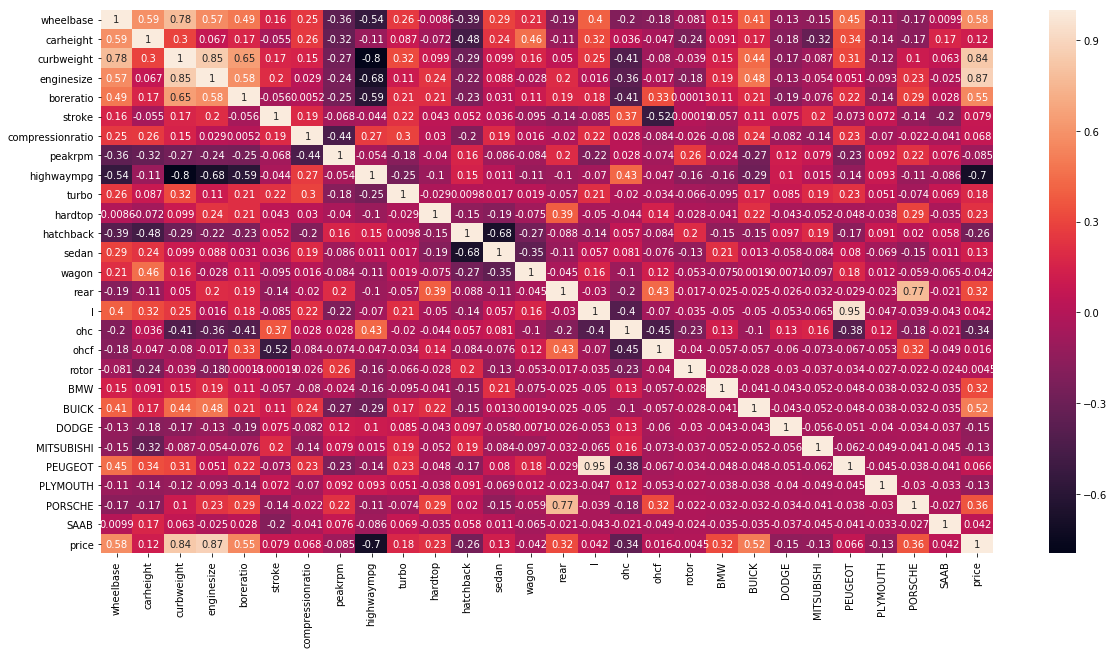

In [50]:
col_list = X_train_rfe.columns.get_values().tolist()
col_list.remove('const')
col_list.append('price')

##plot correlation heat map amongst numeric continuous features
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(car_price_model[col_list].corr(),annot = True)

In [51]:
##Clearly in model 4 the p-value of 'compressionratio' is high i.e. 0.108 and it is not significantly related to price as
# correlation value between price and compressionratio is 0.068.. so it is better to drop 'compressionratio'

##  Model 5
X_train_rfe.drop(columns = 'compressionratio', inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print('\t \t \t \t Model 5')
print(lm.summary())

	 	 	 	 Model 5
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     95.43
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.10e-66
Time:                        15:53:53   Log-Likelihood:                -1261.8
No. Observations:                 143   AIC:                             2578.
Df Residuals:                     116   BIC:                             2658.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2816.4567   2018.726    

In [52]:
##We can check from statistics that the model 5 has below findings
#  -all feature level p-values are less than 0.05 i.e. all the coefficients are justified
#  -the R-square value 0.955 and adjusted R-square value 0.945 which is quite close so there is very very less multicollinear effect
#  -the F-statistic and probability of F-statistic is also consistent

##So we consider model 5 to be 'Significant Model 2'

In [53]:
##Lets calculate the VIF to check if there are any significant multicollinearity
# Calculate the VIFs for the new model
cal_VIF(X_train_rfe)

      Features     VIF
0        const  174.87
3   curbweight   22.48
12       sedan   17.34
4   enginesize   14.77
11   hatchback   14.46
15           l   11.52
23     PEUGEOT   10.81
13       wagon    8.72
1    wheelbase    7.54
16         ohc    5.49
8   highwaympg    4.88
2    carheight    4.81
17        ohcf    4.71
5    boreratio    3.89
18       rotor    3.07
10     hardtop    2.72
14        rear    2.66
6       stroke    2.44
25     PORSCHE    2.33
7      peakrpm    2.10
9        turbo    2.00
20       BUICK    1.73
22  MITSUBISHI    1.57
19         BMW    1.48
21       DODGE    1.41
26        SAAB    1.33
24    PLYMOUTH    1.27


In [54]:
##So from VIF score we can see that the feature 'curbweight' has high multicollinearity, so lets remove the feature 'curbweight' from model and predict

##  Model 6
X_train_rfe.drop(columns = 'curbweight', inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print('\t \t \t \t Model 6')
print(lm.summary())

	 	 	 	 Model 6
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     84.46
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.57e-63
Time:                        15:53:53   Log-Likelihood:                -1273.4
No. Observations:                 143   AIC:                             2599.
Df Residuals:                     117   BIC:                             2676.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6344.1233   2009.301    

In [55]:
##Clearly p-value of feature 'ohcf' is high, so we remove this feature from model
##  Model 7
X_train_rfe.drop(columns = 'ohcf', inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print('\t \t \t \t Model 7')
print(lm.summary())

	 	 	 	 Model 7
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     86.81
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.25e-63
Time:                        15:53:53   Log-Likelihood:                -1274.9
No. Observations:                 143   AIC:                             2600.
Df Residuals:                     118   BIC:                             2674.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7090.6564   1963.663    

In [56]:
##Clearly p-value of feature 'highwaympg' is high, so we remove this feature from model
##  Model 8
X_train_rfe.drop(columns = 'highwaympg', inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print('\t \t \t \t Model 8')
print(lm.summary())

	 	 	 	 Model 8
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     91.03
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.58e-64
Time:                        15:53:53   Log-Likelihood:                -1275.1
No. Observations:                 143   AIC:                             2598.
Df Residuals:                     119   BIC:                             2669.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7787.4007   1620.341    

In [57]:
##Clearly p-value of derived feature 'PLYMOUTH' is high, so we remove this feature from model
##  Model 9
X_train_rfe.drop(columns = 'PLYMOUTH', inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print('\t \t \t \t Model 9')
print(lm.summary())

	 	 	 	 Model 9
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     93.29
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.76e-65
Time:                        15:53:54   Log-Likelihood:                -1277.0
No. Observations:                 143   AIC:                             2600.
Df Residuals:                     120   BIC:                             2668.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7304.5818   1612.557    

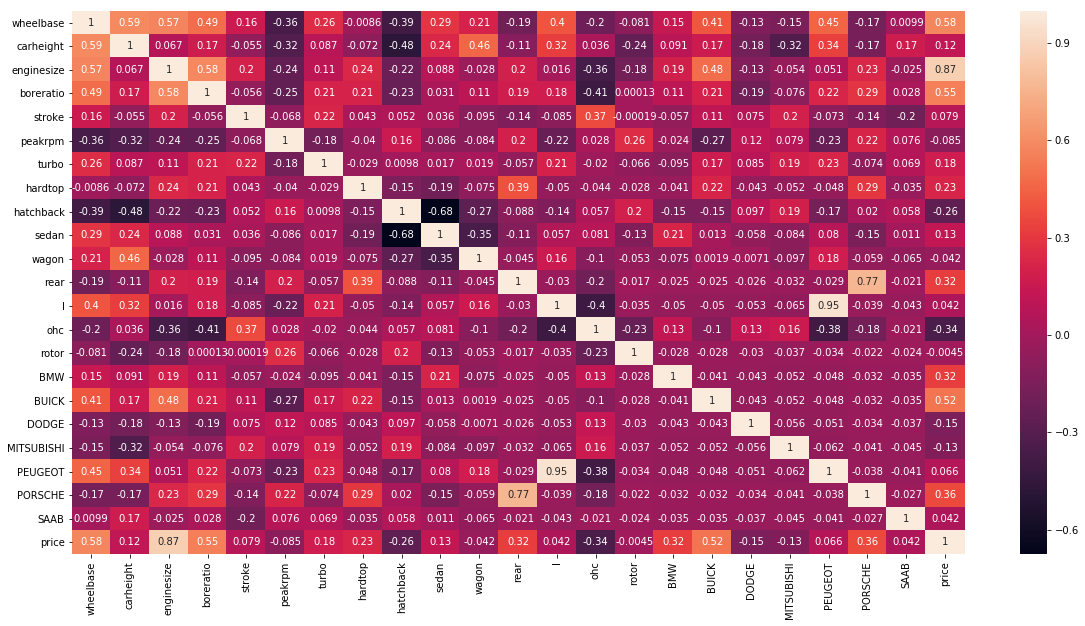

In [58]:
all_features
col_list = X_train_rfe.columns.get_values().tolist()
col_list.remove('const')
col_list.append('price')

##plot correlation heat map amongst numeric continuous features
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(car_price_model[col_list].corr(),annot = True)

In [59]:
##Clearly 'carheight' has high p-value and it does not have significant correlation value with price, so we drop carheight
##  Model 10
X_train_rfe.drop(columns = 'carheight', inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print('\t \t \t \t Model 10')
print(lm.summary())

	 	 	 	 Model 10
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     95.82
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.78e-65
Time:                        15:53:56   Log-Likelihood:                -1278.9
No. Observations:                 143   AIC:                             2602.
Df Residuals:                     121   BIC:                             2667.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6277.2117   1521.514   

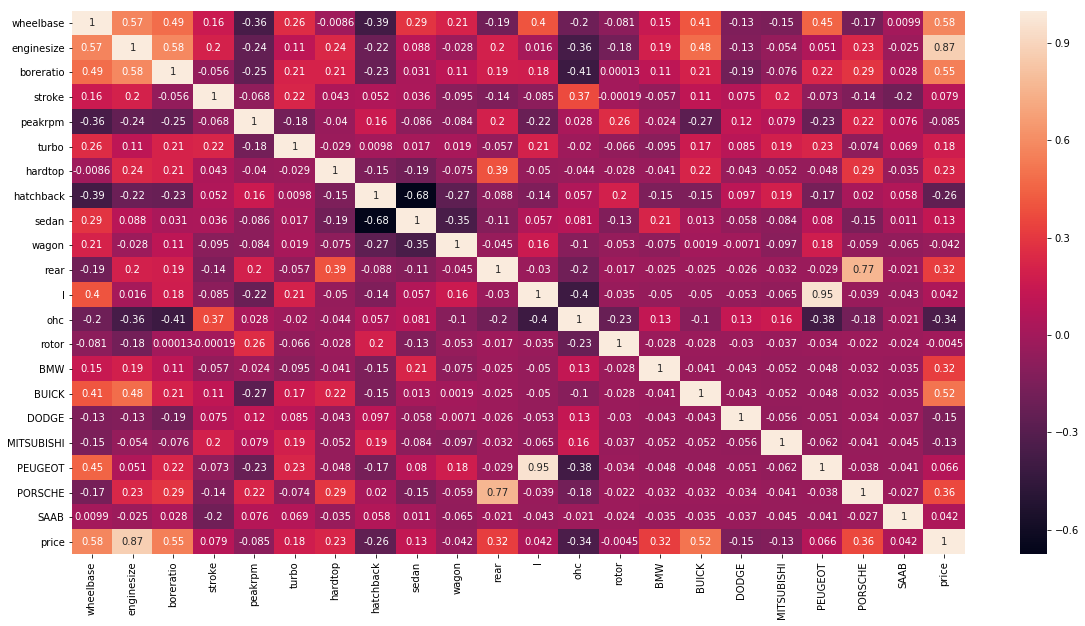

In [60]:
col_list = X_train_rfe.columns.get_values().tolist()
col_list.remove('const')
col_list.append('price')

##plot correlation heat map amongst numeric continuous features
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(car_price_model[col_list].corr(),annot = True)

In [61]:
##Clearly derived feature 'DODGE' has high p-value and it does not have significant correlation value with price, 
# so we drop 'DODGE'
##  Model 11
X_train_rfe.drop(columns = 'DODGE', inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print('\t \t \t \t Model 11')
print(lm.summary())

	 	 	 	 Model 11
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     99.87
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           9.03e-66
Time:                        15:54:00   Log-Likelihood:                -1280.0
No. Observations:                 143   AIC:                             2602.
Df Residuals:                     122   BIC:                             2664.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6201.9408   1525.446   

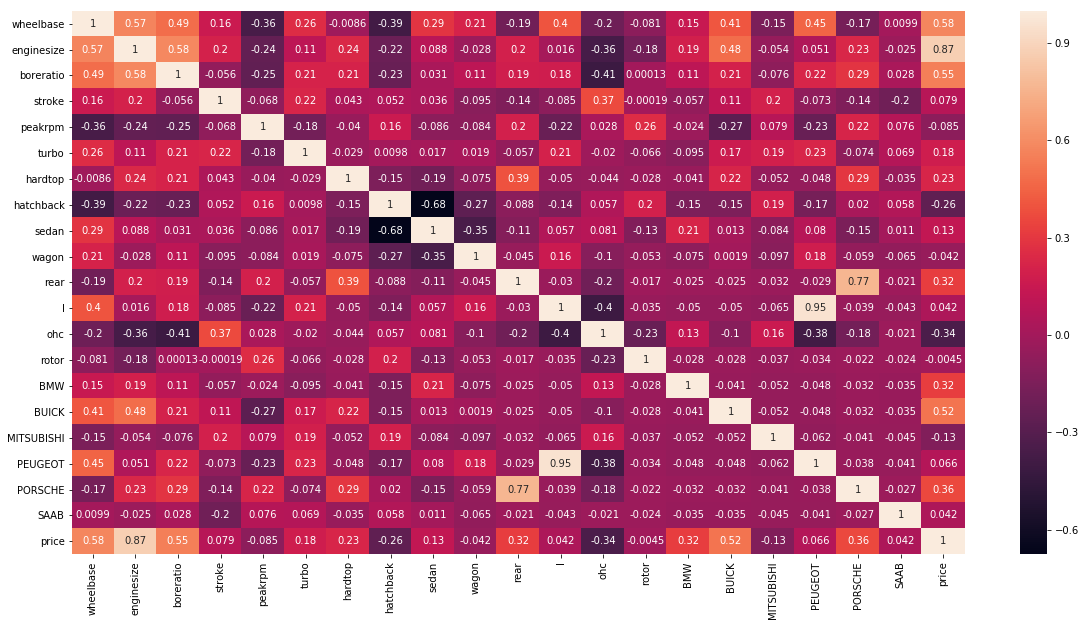

In [62]:
col_list = X_train_rfe.columns.get_values().tolist()
col_list.remove('const')
col_list.append('price')

##plot correlation heat map amongst numeric continuous features
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(car_price_model[col_list].corr(),annot = True)

In [63]:
##Clearly derived feature 'ohc' has high p-value and it does not have significant correlation value with price,
# so we drop ohc
##  Model 12
X_train_rfe.drop(columns = 'ohc', inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print('\t \t \t \t Model 12')
print(lm.summary())

	 	 	 	 Model 12
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.93e-66
Time:                        15:54:02   Log-Likelihood:                -1281.4
No. Observations:                 143   AIC:                             2603.
Df Residuals:                     123   BIC:                             2662.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6747.9140   1494.148   

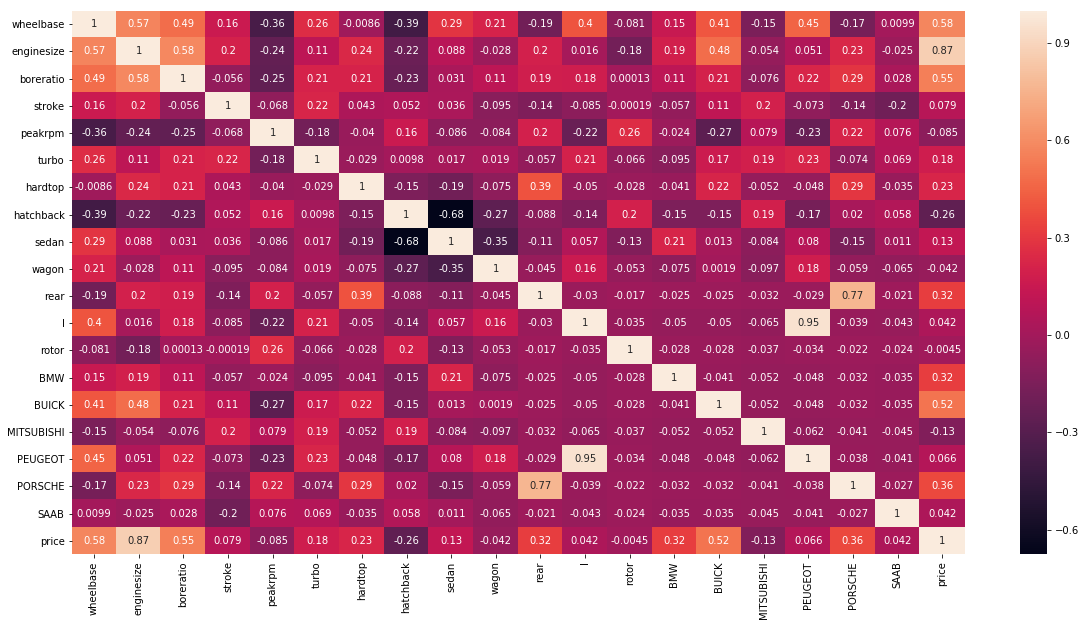

In [64]:
col_list = X_train_rfe.columns.get_values().tolist()
col_list.remove('const')
col_list.append('price')

##plot correlation heat map amongst numeric continuous features
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(car_price_model[col_list].corr(),annot = True)

In [65]:
##Clearly feature 'stroke' has high p-value and it does not have significant correlation value with price,
# so we drop stroke
##  Model 13
X_train_rfe.drop(columns = 'stroke', inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print('\t \t \t \t Model 13')
print(lm.summary())

	 	 	 	 Model 13
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     107.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.24e-66
Time:                        15:54:05   Log-Likelihood:                -1283.2
No. Observations:                 143   AIC:                             2604.
Df Residuals:                     124   BIC:                             2661.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5693.3520   1378.355   

In [66]:
##We can check from statistics that the model 13 has below findings
#  -all feature level p-values are less than 0.05 i.e. all the coefficients are justified
#  -the R-square value 0.940 and adjusted R-square value 0.931 which is quite close so there is very very less multicollinear effect
#  -the F-statistic and probability of F-statistic is also consistent

##So we consider model 13 to be 'Significant Model 3'

In [67]:
##Lets calculate the VIF to check if there are any significant multicollinearity
# Calculate the VIFs for the new model
cal_VIF(X_train_rfe)

      Features    VIF
0        const  64.67
8        sedan  13.08
7    hatchback  11.46
16     PEUGEOT  10.27
11           l   8.91
9        wagon   6.77
1    wheelbase   3.96
2   enginesize   2.73
6      hardtop   2.42
3    boreratio   2.20
10        rear   2.10
17     PORSCHE   2.02
14       BUICK   1.56
4      peakrpm   1.51
12       rotor   1.35
5        turbo   1.34
15  MITSUBISHI   1.19
13         BMW   1.16
18        SAAB   1.09


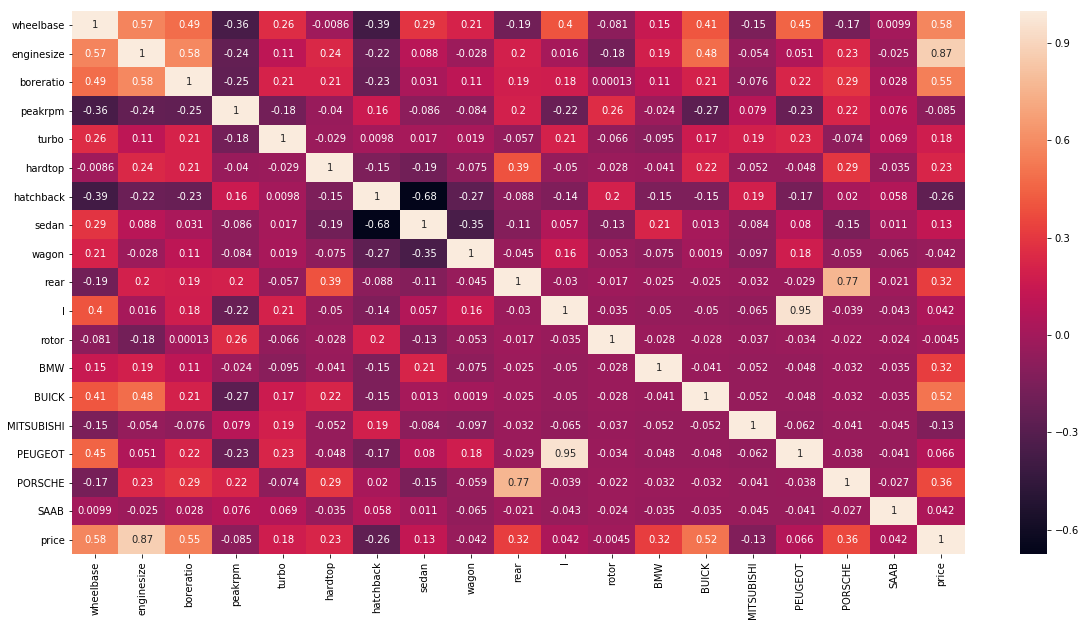

In [68]:
col_list = X_train_rfe.columns.get_values().tolist()
col_list.remove('const')
col_list.append('price')

##plot correlation heat map amongst numeric continuous features
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(car_price_model[col_list].corr(),annot = True)

In [69]:
##Clearly from model 13, derived feature 'sedan' has high VIF score of 13.08 and the its correlation vale with price 
# i.e. 0.13 is also insignificant, so we drop feautre 'sedan'

##  Model 14
X_train_rfe.drop(columns = 'sedan', inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print('\t \t \t \t Model 14')
print(lm.summary())

	 	 	 	 Model 14
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     93.34
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.81e-62
Time:                        15:54:07   Log-Likelihood:                -1297.0
No. Observations:                 143   AIC:                             2630.
Df Residuals:                     125   BIC:                             2683.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        177.8109    949.606   

In [70]:
##Lets calculate the VIF to check if there are any significant multicollinearity
# Calculate the VIFs for the new model
cal_VIF(X_train_rfe)

      Features    VIF
0        const  25.50
15     PEUGEOT  10.08
10           l   8.90
1    wheelbase   3.05
2   enginesize   2.54
3    boreratio   2.16
9         rear   2.09
16     PORSCHE   1.98
6      hardtop   1.54
4      peakrpm   1.51
7    hatchback   1.46
13       BUICK   1.41
11       rotor   1.35
5        turbo   1.33
8        wagon   1.18
14  MITSUBISHI   1.18
12         BMW   1.16
17        SAAB   1.09


In [71]:
##In model 14, both feature hardtop and wagon has same high p-value 0.478, and VIF of both are under control, however wagon is
# relatively less related to pricing as per correlation, so we drop wagon

##  Model 15
X_train_rfe.drop(columns = 'wagon', inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print('\t \t \t \t Model 15')
print(lm.summary())

	 	 	 	 Model 15
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     99.53
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.29e-63
Time:                        15:54:07   Log-Likelihood:                -1297.3
No. Observations:                 143   AIC:                             2629.
Df Residuals:                     126   BIC:                             2679.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.7131    942.781   

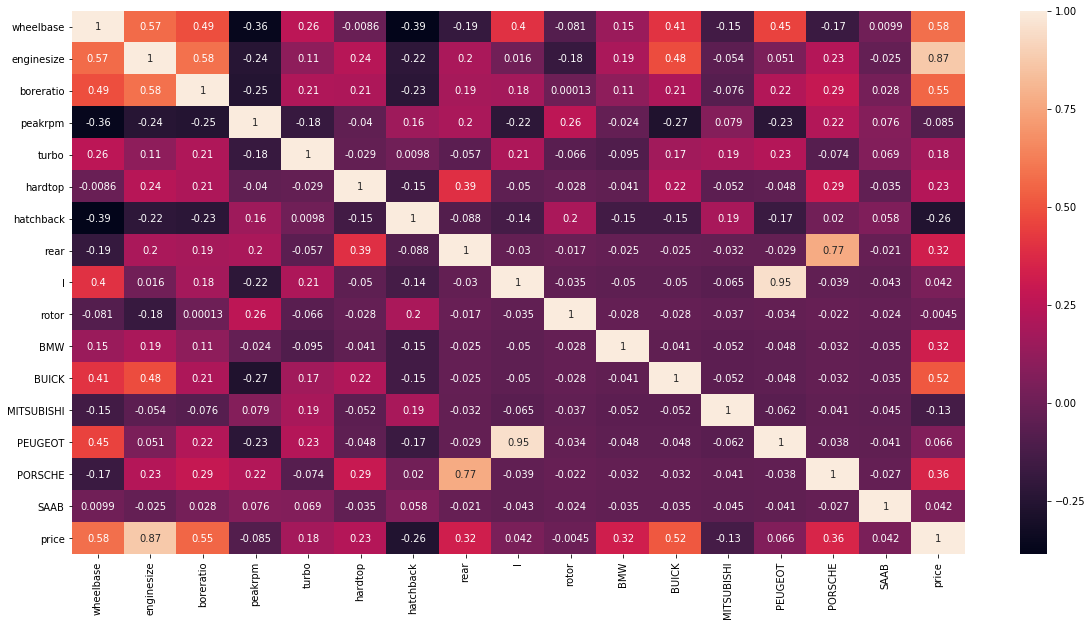

In [72]:
col_list = X_train_rfe.columns.get_values().tolist()
col_list.remove('const')
col_list.append('price')

##plot correlation heat map amongst numeric continuous features
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(car_price_model[col_list].corr(),annot = True)

In [73]:
##Clearly derived feature 'hardtop' has high p-value and it has insignificant correlation with price so we drop hardtop
##  Model 16
X_train_rfe.drop(columns = 'hardtop', inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print('\t \t \t \t Model 16')
print(lm.summary())

	 	 	 	 Model 16
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     106.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.70e-64
Time:                        15:54:09   Log-Likelihood:                -1297.5
No. Observations:                 143   AIC:                             2627.
Df Residuals:                     127   BIC:                             2674.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.6095    939.324   

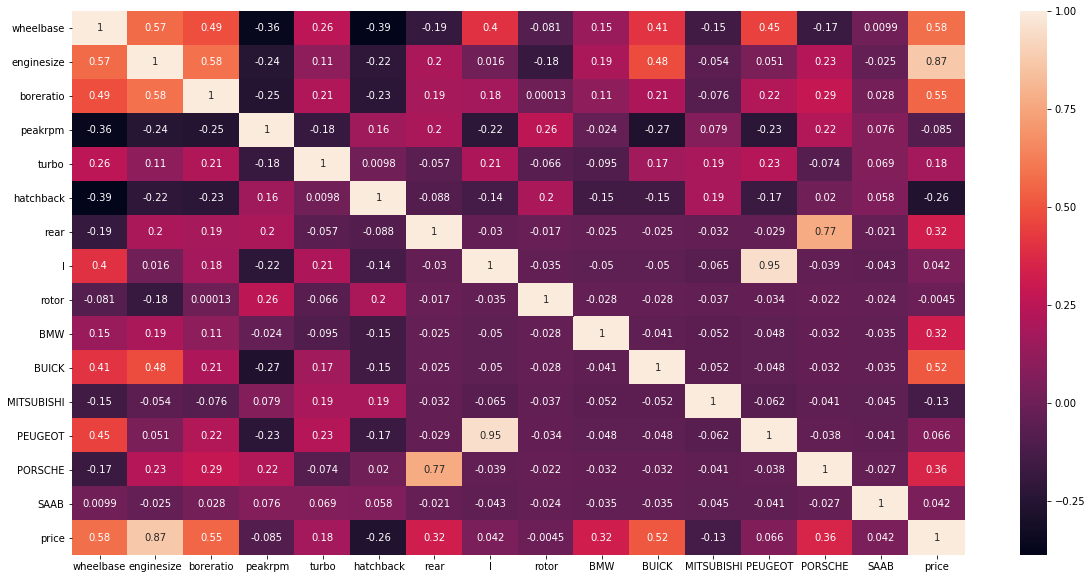

In [74]:
col_list = X_train_rfe.columns.get_values().tolist()
col_list.remove('const')
col_list.append('price')

##plot correlation heat map amongst numeric continuous features
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(car_price_model[col_list].corr(),annot = True)

In [75]:
##Clearly feature 'boreratio' has high p-value and it has insignificant correlation with price so we drop boreratio
##  Model 17
X_train_rfe.drop(columns = 'boreratio', inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print('\t \t \t \t Model 17')
print(lm.summary())

	 	 	 	 Model 17
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     113.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           6.88e-65
Time:                        15:54:10   Log-Likelihood:                -1298.7
No. Observations:                 143   AIC:                             2627.
Df Residuals:                     128   BIC:                             2672.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -697.8969    773.512   

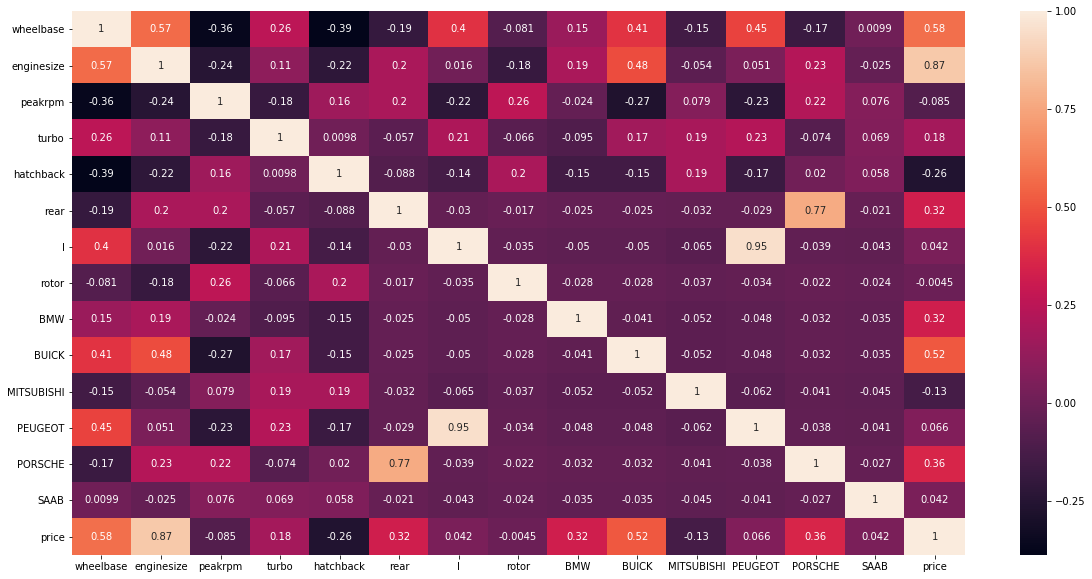

In [76]:
col_list = X_train_rfe.columns.get_values().tolist()
col_list.remove('const')
col_list.append('price')

##plot correlation heat map amongst numeric continuous features
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(car_price_model[col_list].corr(),annot = True)

In [77]:
##Clearly feature 'hatchback' has high p-value and it has insignificant correlation with price so we drop boreratio
##  Model 18
X_train_rfe.drop(columns = 'hatchback', inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print('\t \t \t \t Model 18')
print(lm.summary())

	 	 	 	 Model 18
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     119.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.89e-65
Time:                        15:54:12   Log-Likelihood:                -1300.4
No. Observations:                 143   AIC:                             2629.
Df Residuals:                     129   BIC:                             2670.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1129.6765    740.451   

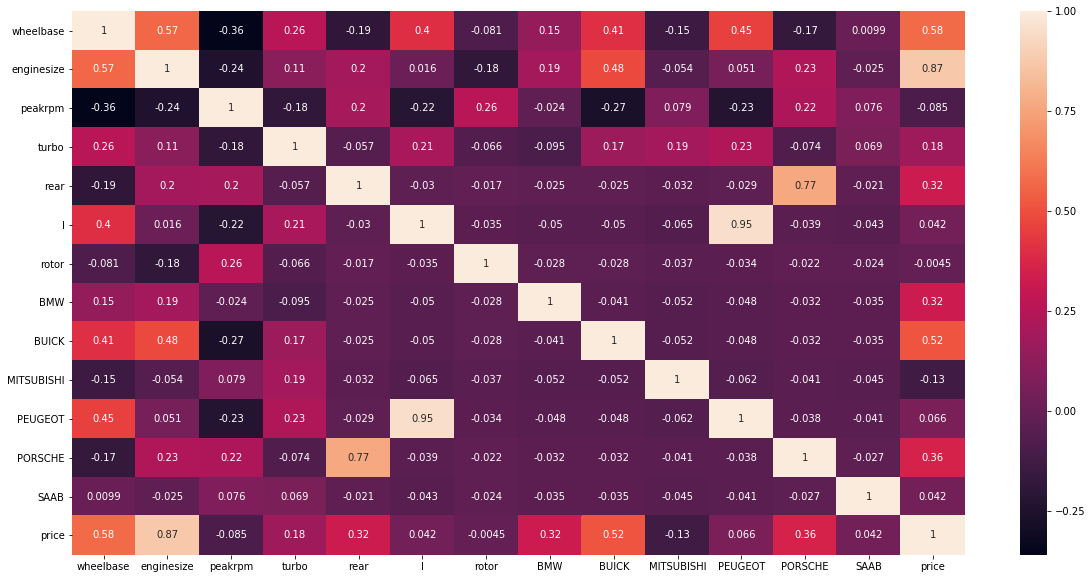

In [78]:
col_list = X_train_rfe.columns.get_values().tolist()
col_list.remove('const')
col_list.append('price')

##plot correlation heat map amongst numeric continuous features
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(car_price_model[col_list].corr(),annot = True)

In [79]:
##Clearly derived feature 'l' has high p-value and it has insignificant correlation with price so we drop 'l'
##  Model 19
X_train_rfe.drop(columns = 'l', inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print('\t \t \t \t Model 19')
print(lm.summary())

	 	 	 	 Model 19
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     127.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.27e-65
Time:                        15:54:18   Log-Likelihood:                -1302.2
No. Observations:                 143   AIC:                             2630.
Df Residuals:                     130   BIC:                             2669.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -908.1409    736.794   

In [80]:
##We can check from statistics that the model 19 has below findings
#  -all feature level p-values are less than equal to 0.05 (nearly) i.e. all the coefficients are justified
#  -the R-square value 0.921 and adjusted R-square value 0.914 which is quite close so there is very very less multicollinear effect
#  -the F-statistic and probability of F-statistic is also consistent

##So we consider model 19 to be 'Significant Model 4'

In [81]:
##Lets calculate the VIF to check if there are any significant multicollinearity
# Calculate the VIFs for the new model
cal_VIF(X_train_rfe)

      Features    VIF
0        const  14.84
1    wheelbase   2.78
2   enginesize   2.18
10     PEUGEOT   1.68
11     PORSCHE   1.64
5         rear   1.53
8        BUICK   1.39
3      peakrpm   1.38
4        turbo   1.31
6        rotor   1.17
9   MITSUBISHI   1.16
7          BMW   1.13
12        SAAB   1.02


Clearly VIF also under control so we consider this to be a good model

# Residual Analysis of the train data

In [82]:
##So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions 
# of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [83]:
y_train_price = lm.predict(X_train_rfe)

Text(0.5,0,'Errors')

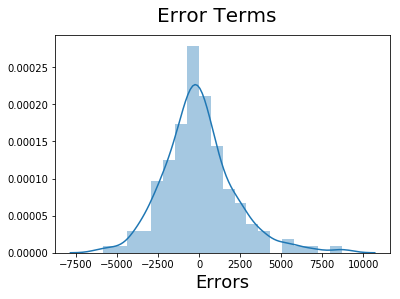

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   # X-label

We can clearly see that the Error is normally distributed accross mean 0

# Making Prediction with Test dataset

In [85]:
##Making Predictions

##Applying the scaling on the test sets
df_test[apply_norm_features] = scaler.transform(df_test[apply_norm_features])

df_test.head()

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
160          0           4   0.313793   0.409756  0.341667   0.460177   
186          2           4   0.368966   0.497561  0.433333   0.699115   
59           1           2   0.420690   0.596748  0.516667   0.522124   
165          1           2   0.272414   0.448780  0.308333   0.424779   
140          2           2   0.231034   0.263415  0.291667   0.699115   

     curbweight  cylindernumber  enginesize  boreratio     ...       PEUGEOT  \
160    0.235066               4    0.139623   0.404762     ...             0   
186    0.305275               4    0.181132   0.404762     ...             0   
59     0.347944               4    0.230189   0.563492     ...             0   
165    0.301396               4    0.139623   0.444444     ...             0   
140    0.291699               4    0.177358   0.746032     ...             0   

     PLYMOUTH  PORSCHE  RENAULT  SAAB  SUBARU  TOYOTA  VOLKSWAGEN  VOLVO  \
160         0        0        0     0       0       1           0      0   
186         0        0        0     0       0       0           1      0   
59          0        0        0     0       0       0           0      0   
165         0        0        0     0       0       1           0      0   
140         0        0        0     0       1       0           0      0   

     ground_area  
160     0.365795  
186     0.454965  
59      0.550901  
165     0.380265  
140     0.253803  

[5 rows x 61 columns]

In [86]:
##Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [87]:
# Now let's use our model to make predictions.

# Adding a constant variable 
X_test_new = sm.add_constant(X_test)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test_new[X_train_rfe.columns]

# Adding a constant variable 
#X_test_new = sm.add_constant(X_test_new)

In [88]:
# Making predictions
y_pred = lm.predict(X_test_new)

# Evaluation of Model

In [89]:
r2_score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Test Dataset R2 Score::\t', r2_score)
print('Test Dataset Mean Squared Error::\t',mse)
print('Test Dataset Root Mean Squared Error::\t',sqrt(mse))

Test Dataset R2 Score::	 0.9105629561898883
Test Dataset Mean Squared Error::	 6263195.36723238
Test Dataset Root Mean Squared Error::	 2502.6376819732377


Text(0,0.5,'Price')

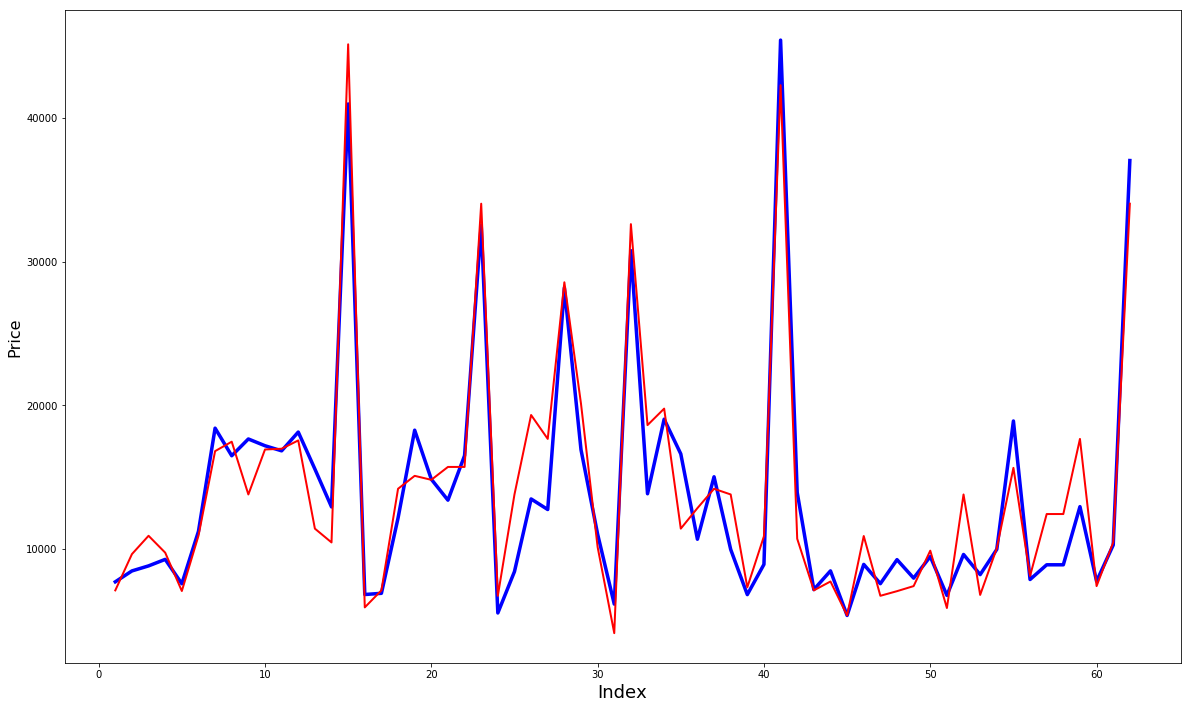

In [90]:
c = [i for i in range(1,63,1)]
plt.figure(figsize=(20, 12))
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-") #Actual Result
plt.plot(c,y_pred, color="red",  linewidth=2.0, linestyle="-") #Predicted Result
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)   

The above plot shows actual price in Blue line and predicted price in Red line. We can clearly see that the model is a perfect fit which is neither 'Under-Fit' nor 'Over-fit'. So we conclude that model-19 as the final model

We can see that the equation of our best fitted line is:
price = -908.1409 + (7640.7971 x wheelbase) + (3.289e+04 x enginesize) + (3999.6957 x peakrpm) + (2953.6162 x turbo) + (6591.0631 x rear) + (7188.4395 x rotor) + (8652.8743 x BMW) + (5753.3586 x BUICK) + (-2845.3243 x MITSUBISHI) + (-1978.7413 x PEUGEOT) + (8217.2235 x PORSCHE) + (2578.2971 x SAAB)

# Business Problem Statement and proposed solution

The company wants to know:

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

The solution to the above two problem statements are below in same sequence

1. So below features are effective in identifying the price
   <br>A. Wheelbase
   <br>B. Engine Size
   <br>C. Peak RPM
   <br>D.Turbo (which is one of the types of Aspiration)
   <br>E. Rear (Location of Engine i.e. Front/Rear)
   <br>F. Rotor (which is one of the types of Engines)
   <br>G. BMW (one of the Car manufacturing Companies in the region) 
   <br>H. BUICK (one of the Car manufacturing Companies in the region)
   <br>I. MITSUBISHI (one of the Car manufacturing Companies in the region)
   <br>J. PEUGEOT (one of the Car manufacturing Companies in the region)
   <br>K. PORSCHE (one of the Car manufacturing Companies in the region)
   <br>L. SAAB (one of the Car manufacturing Companies in the region)
   <br><br>
2. We describe the effect of these features in detail below:
   <br>A. Wheelbase (considering the standard wheelbase size, for each unit increase in the size the price increases by 7640.7971)
   <br>B. Engine Size (considering the standard Engine size, for each unit increase in the size the price increases by 3.289e+04)
   <br>C. Peak RPM (considering the standard Peak RMP, for each unit increase in the PeamRPM the price increases by 3999.6957)
   <br>D.Turbo (Presence of Turbo aspiration type increases the price by 2953.6162)
   <br>E. Rear (Presence of engine at the Rear end of the vehicle increases the price by 6591.0631)
   <br>F. Rotor (Presence of Rotor type of Engine increases the price by 7188.4395)
   <br>G. BMW (BMW has a positive impact on the price of its vehicle as the price increases by 8652.8743 for BMW brand) 
   <br>H. BUICK (BUICK has a positive impact on the price of its vehicle as the price increases by 5753.3586 for BUICK brand)
   <br>I. MITSUBISHI (MITSUBISHI has a negative impact on the price of its vehicle as the price decreases by 2845.3243 for MITSUBISHI brand)
   <br>J. PEUGEOT (PEUGEOT has a negative impact on the price of its vehicle as the price decreases by 1978.7413 for PEUGEOT brand)
   <br>K. PORSCHE (PORSCHE has a positive impact on the price of its vehicle as the price increases by 8217.2235 for PORSCHE brand)
   <br>L. SAAB (SAAB has a positive impact on the price of its vehicle as the price increases by 2578.2971 for SAAB brand)